# Ridge回帰

## モデル

**リッジ回帰**（ridge regression）は誤差関数に正則化項を追加した線形回帰モデルである。

モデル自体は線形回帰と同様で目的変数$y$をパラメータ$\boldsymbol{\beta}=(\beta_1, \beta_2, ..., \beta_d)^\top$と特徴量$\boldsymbol{x}=(x_1, x_2, ..., x_d)^\top$の線形関数と誤差$\varepsilon$で表現するものになる。

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_d x_d + \varepsilon
$$

サンプルサイズが$n$のデータセット$\{\boldsymbol{x}_i, y_i\}^n_{i=1}$があるとして、目的変数を$\boldsymbol{y} = (y_1, y_2, ..., y_n)^\top$、特徴量を$\boldsymbol{X}=(\boldsymbol{x}_1, \boldsymbol{x}_2, ..., \boldsymbol{x}_n)^\top$とおくと

$$
\boldsymbol{y}=\boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{\varepsilon}
$$

と表記することもできる。


## パラメータの推定

### 制約付き最小化問題

リッジ回帰が線形回帰と違う点は、パラメータの推定（誤差関数の最小化）に関して制約条件があること。

線形回帰は目的変数の実測値$y_i$と予測値$\hat{y}_i=\sum^d_{j=1} x_{ij} \beta_j$の誤差二乗和$SSE=\sum^n_{i=1} (y_i - \hat{y}_i)^2$を最小にするパラメータを求めるものであった。

$$
\newcommand{\argmin}{\mathop{\rm arg~min}\limits}
\hat{\boldsymbol{\beta}}^{\text{LS}} = \argmin_{\boldsymbol{\beta}}
\sum^n_{i=1} (y_i - \hat{y}_i)^2
$$

リッジ回帰はこれに「パラメータ$\beta_j$の二乗和がある値$R$以下である」という制約条件が付いた下でパラメータを推定する。

$$
\newcommand{\argmin}{\mathop{\rm arg~min}\limits}
\begin{align}
\hat{\boldsymbol{\beta}}^{\text{Ridge}} = \text{ } 
& \argmin_{\boldsymbol{\beta}} \sum^n_{i=1} (y_i - \hat{y}_i)^2
\\
& \text{subject to } \sum^d_{i=1} \beta_j^2 \leq R
\end{align}
$$

この問題を解くために、**ラグランジュの未定乗数法**を利用する。

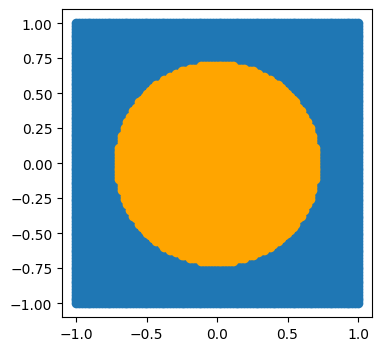

In [1]:
# 二乗和が円になるイメージ
import numpy as np
import matplotlib.pyplot as plt
import itertools

R = 0.5
b1 = np.linspace(-1, 1, 100)
b2 = np.linspace(-1, 1, 100)
b = np.array(list(itertools.product(b1, b2)))
is_in_R = (b[:, 0]**2 + b[:, 1]**2) <= R

fig, ax = plt.subplots(figsize=[4, 4])
ax.scatter(b[~is_in_R, 0], b[~is_in_R, 1])
ax.scatter(b[is_in_R, 0], b[is_in_R, 1], color="orange")

### 誤差関数の整理

ラグランジュの未定乗数法を利用して、誤差関数を以下のように書くことができる。

$$
J({\boldsymbol{\beta}})
= \sum_{i=1}^n(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^d \beta_j^2
$$

この右辺第二項は**正則化項**、$\lambda$は**正則化パラメータ**と呼ばれる。$\lambda=0$のときは最小二乗法と同じ誤差関数になり、得られる推定量も最小二乗推定量と等しくなる。

一般的なラグランジュ双対問題とは異なり、リッジ回帰では最適な$\lambda$を推定することはせず、あらかじめ$\lambda$を指定して$x$を推定する。（誤差を最小にする$\lambda$はゼロであり、正則化の意味がなくなるためだと思われる。）

また、最初の制約問題で登場した$R$は誤差関数に含めない（おそらく誤差関数を$\beta$について微分したときに定数項の$R$は消えて特に影響をもたらさないため）

ちなみに行列表記するとこんな感じに表される。

$$
\begin{align}
J({\boldsymbol{\beta}})
&= \sum_{i=1}^n(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^d \beta_j^2
\\
&= \| \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\|^2_2
+ \lambda\| \boldsymbol{\beta}\|^2_2
\\
&= (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^\top 
(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})
+ \lambda \boldsymbol{\beta}^\top \boldsymbol{\beta}
\end{align}
$$

リッジ回帰の推定量$\hat{\boldsymbol{\beta}}^{\text{Ridge}}$は解析的に解くことができ、

$$
\begin{align}
J(\boldsymbol{\beta})
&= (\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})^\top 
(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta})
+ \lambda \boldsymbol{\beta}^\top \boldsymbol{\beta}
\\
&= \boldsymbol{y}^\top \boldsymbol{y}
- \boldsymbol{y}^\top \boldsymbol{X}\boldsymbol{\beta}
- (\boldsymbol{X}\boldsymbol{\beta})^\top \boldsymbol{y}
+ (\boldsymbol{X}\boldsymbol{\beta})^\top
(\boldsymbol{X}\boldsymbol{\beta})
+ \lambda \boldsymbol{\beta}^\top \boldsymbol{\beta}
\\
&= \boldsymbol{y}^\top \boldsymbol{y}
- 2 \boldsymbol{\beta}^\top \boldsymbol{X}^\top \boldsymbol{y}
+ \boldsymbol{\beta}^\top \boldsymbol{X}^\top 
\boldsymbol{X} \boldsymbol{\beta}
+ \lambda \boldsymbol{\beta}^\top \boldsymbol{\beta}
\end{align}
$$

なので、誤差関数の傾きがゼロ（誤差が最小値）の点を求めると

$$
\frac{\partial J(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}
= -2\boldsymbol{X}^\top\boldsymbol{y}
+ 2(\boldsymbol{X}^\top\boldsymbol{X})\boldsymbol{\beta}
+ 2\lambda\boldsymbol{\beta}
=\boldsymbol{0}
\\
\Longrightarrow
(\boldsymbol{X}^\top\boldsymbol{X})\boldsymbol{\beta}
+ \lambda\boldsymbol{\beta}
=\boldsymbol{X}^\top\boldsymbol{y}
\\
\Longrightarrow
(\boldsymbol{X}^\top\boldsymbol{X} + \lambda \boldsymbol{I})\boldsymbol{\beta}
=\boldsymbol{X}^\top\boldsymbol{y}
$$

となり、

$$
\hat{\boldsymbol{\beta}}^{\text{Ridge}}
= (\boldsymbol{X}^\top \boldsymbol{X} + \lambda \boldsymbol{I})^{-1}
\boldsymbol{X}^\top \boldsymbol{y}
$$

となる。

## リッジ回帰の特徴

リッジ回帰は制約をかけたことにより通常の線形回帰（最小二乗法）とは異なる特徴をもっている。

### 正則化

線形回帰の最小二乗推定量$\hat{\boldsymbol{\beta}}^{\text{LS}}$は次のようなものだった。

$$
\hat{\boldsymbol{\beta}}^{\text{LS}}
= (\boldsymbol{X}^\top \boldsymbol{X})^{-1}
\boldsymbol{X}^\top \boldsymbol{y}
$$
このとき、

1. $\boldsymbol{X}$の列数が行数よりも多い（サンプルサイズより特徴量の次元数のほうが多い）
2. 特徴量間の相関が非常に強い

といった状況においては、$\boldsymbol{X}^\top \boldsymbol{X}$が正則でなくなって逆行列が計算できなくなったり、あるいは推定が不安定になることがある。

そこでリッジ回帰の推定量$\hat{\boldsymbol{\beta}}^{\text{Ridge}}$では

$$
\hat{\boldsymbol{\beta}}^{\text{Ridge}}
= (\boldsymbol{X}^\top \boldsymbol{X} + \lambda \boldsymbol{I})^{-1}
\boldsymbol{X}^\top \boldsymbol{y}
$$

と、$\boldsymbol{X}^\top \boldsymbol{X}$の対角成分に$\lambda$を足すことで尾根（ridge）を作り、正則にすることで逆行列が計算できるようにしている。


:::{admonition} リッジ推定量が正則となる証明

$X$は$n$次の実行列とする。実対称行列$X^\top X$は非負値定符号行列であるため、

$$
X^\top X = P \Gamma P^\top
$$

と分解可能。ここで$P$は直交行列であり、$\gamma = \mathrm{diag}(\gamma_1, \cdots, \gamma_n)$は$X^\top X$の固有値（$\gamma_1 \geq \cdots \geq \gamma_n \geq 0$）を対角成分にもつ対角行列。

もし$\gamma_n = 0$なら$X^\top X$の逆行列は存在せず、$\gamma_n > 0$なら逆行列は存在し、

$$
\begin{aligned}
(X^\top X)^{-1}
&= (P \Gamma P^\top)^{-1}\\
&= P \Gamma^{-1} P^\top \quad (\because (ABC)^{-1} = (C^{-1} B^{-1} A^{-1}) であり、 Pは直交行列なのでP^\top = P^{-1})\\
&= P \operatorname{diag}(1 / \Gamma_1, \ldots, 1 / \Gamma_p) P^\top
\end{aligned}
$$

となる。$X^\top X$の最小固有値が$\gamma_n \to 0$の場合、$1/\gamma_n \to \infty$になり逆行列が計算できない。

一方、リッジ推定量のように$X^\top X + \lambda I$とする（$\lambda \in\mathbb{R}$）と、その逆行列は

$$
\begin{aligned}
(X^\top X + \lambda I)^{-1}
&= (P \Gamma P^\top + \lambda I)^{-1}\\
&= \{ P (\Gamma + \lambda I) P^\top \}^{-1}\\
&= P (\Gamma + \lambda I)^{-1} P^\top\\
&= P \operatorname{diag}[1 / (\Gamma_1 + \lambda I), \ldots, 1 / (\Gamma_p + \lambda I)] P^\top
\end{aligned}
$$

となる。こちらは$\gamma_n \to 0$の場合であっても$1 / (\gamma_p + \lambda I)$は無限大に発散することがないため、$X^\top X + \lambda I$は正則となる。
:::


### 過学習の抑制

リッジ回帰の誤差関数

$$
J(\beta)=
\sum_{i=1}^n(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^d \beta_j^2
$$

は、$\lambda$を大きくすると誤差に占める第二項の比重が大きくなり、パラメータ$\beta_j$の値をゼロに向けて縮小（shrink）させる。

パラメータが学習データに過学習して大きい値になっているような状況ではパラメータをうまく縮小させることによって過学習を抑制してモデルの汎化誤差を下げることができる。


## 推定量のバイアスとバリアンス

正則化しない通常の最小二乗推定量はBLUE（最良線形不偏推定量：線形不偏推定量のなかでバリアンスが最小）だった。
リッジ回帰やlassoの推定量は不偏ではない（バイアスがある）推定量であるが、最小二乗推定量よりも小さなバリアンスとなる可能性がある。
そのため、最小二乗推定法を使用する線形回帰よりもリッジ回帰のほうが予測の2乗誤差を小さくする可能性がある。

$$
\begin{aligned}
\operatorname{Var}(\hat{\beta}^{\text{Ridge}})
&= \sigma^2 (X^\top X + \lambda I)^{-1} X^\top X(X^\top X + \lambda I)^{-1}\\
&\leq \sigma^2 (X^\top X)^{-1} = \operatorname{Var}(\hat{\beta}^{\text{LS}})
\end{aligned}
$$

[Ridge Regression: Biased Estimation for Nonorthogonal Problems](https://www.math.arizona.edu/~hzhang/math574m/Read/RidgeRegressionBiasedEstimationForNonorthogonalProblems.pdf)

https://hastie.su.domains/StatLearnSparsity_files/SLS.pdf


## 参考文献

### リッジ回帰

- 杉山将『イラストで学ぶ機械学習』
- スパース推定
- ESLⅡ
- [Ridge | L2 正則化を用いて多重共線性を回避してパラメーター推定を行う方法](https://stats.biopapyrus.jp/sparse-modeling/ridge.html)
- [リッジ回帰 - 機械学習の「朱鷺の杜Wiki」](http://ibisforest.org/index.php?%E3%83%AA%E3%83%83%E3%82%B8%E5%9B%9E%E5%B8%B0)
- 佐和隆光. (1979). 回帰分析.

### ラグランジュの未定乗数法

- [ラグランジュ緩和と双対問題](http://tomomi.my.coocan.jp/text/relax1.pdf)
- 『言語処理のための機械学習入門』pp.14-19
- [ラグランジュ双対問題について解説 - Qiita](https://qiita.com/birdwatcher/items/b23209f06177373c6df4)
- 『これならわかる最適化数学』
